In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [6]:
souce_list = (
    ['Число родившихся на 1000 населения за год.xls', 'blue'], 
    ['Число умерших в расчете на 1000 населения за год.xls', 'black'],
    ['Число браков в расчете на 1000 населения за год.xls', 'green'], 
    ['Число разводов в расчете на 1000 населения за год.xls', 'red']
)

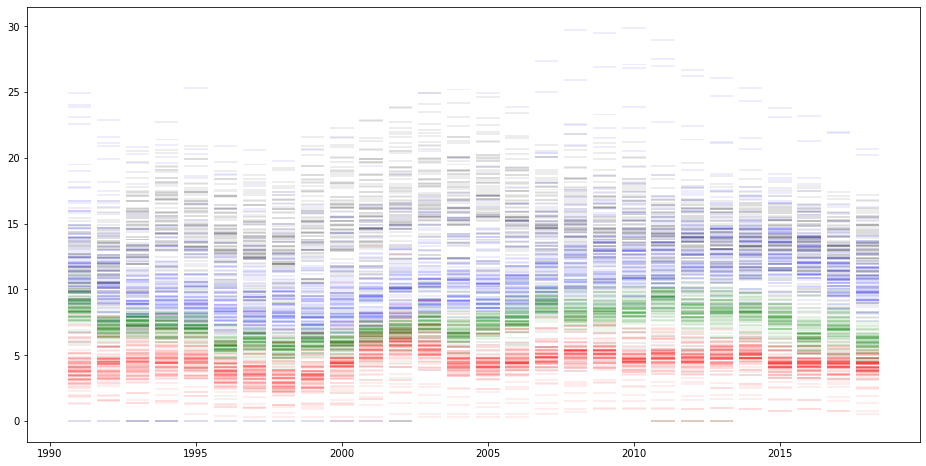

In [12]:
width = .8
height = .15
fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(111)

for files, color in souce_list:
    df = pd.read_excel(files, skiprows=2)
    df.rename(columns = {"Unnamed: 0":"Регион", "Unnamed: 1":"Население"}, inplace=True)
    df_all = df.loc[df['Население'] == 'все население'] 
    df_all = df_all.drop(["Население"], axis = 1)
    df_all_mask = df_all['Регион'].str.contains('      ')
    df_all = df_all[df_all_mask]
    columns_names = df_all.columns.values.tolist()
    columns_names = columns_names[2:]
    df_all = pd.melt(df_all, id_vars=['Регион'] , value_vars=columns_names, var_name='Годы', value_name='Values')
    x = pd.to_numeric(df_all['Годы'].values)
    y = df_all['Values'].values
    
    zipped = zip(x,y)
    for m_x, m_y in zipped:
        ax.add_patch(Rectangle(xy=(m_x-width/2, m_y-height/2), width=width, height=height, linewidth=0, color=color, fill=True, alpha=.07))

ax.axis('auto')

plt.show()